<a href="https://colab.research.google.com/github/Balajinanda/Datascience-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [2]:
# Necessary Libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Loading the data**

In [3]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define the path to the uploaded zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset.zip'
extract_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
extracted_files

['subjectInformation.pdf',
 'DataCollectionProtocol.pdf',
 'readme.pdf',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'Protocol',
 'Optional',
 'PAMAP2_Dataset']

In [5]:
# List the contents of the extracted directory to explore its structure
PAMAP2_dataset_path = os.path.join(extract_dir, 'PAMAP2_Dataset')
dataset_contents = os.listdir(PAMAP2_dataset_path)
dataset_contents

['Protocol',
 'Optional',
 'PerformedActivitiesSummary.pdf',
 'DescriptionOfActivities.pdf',
 'subjectInformation.pdf',
 'readme.pdf',
 'DataCollectionProtocol.pdf']

In [6]:
# List the contents of the 'dataset' folder
dataset_folder_path = os.path.join(PAMAP2_dataset_path, 'Protocol')
dataset_files = os.listdir(dataset_folder_path)
dataset_files

['subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

# **Dataset preparation**

In [7]:
import os
import pandas as pd
import numpy as np

# Path to the dataset directory
data_path = "/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/PAMAP2_Dataset/Protocol"

# Define column names based on dataset documentation
columns = ['timestamp', 'activity_id', 'heart_rate'] + [
    # IMU1 (Hand)
    'hand_temperature',
    'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
    'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z',
    'hand_gyro_X', 'hand_gyro_Y', 'hand_gyro_Z',
    'hand_magnet_X', 'hand_magnet_Y', 'hand_magnet_Z',
    'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
    # IMU2 (Chest)
    'chest_temperature',
    'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
    'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
    'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z',
    'chest_magnet_X', 'chest_magnet_Y', 'chest_magnet_Z',
    'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
    # IMU3 (Ankle)
    'ankle_temperature',
    'ankle_accel_16g_X', 'ankle_accel_16g_Y', 'ankle_accel_16g_Z',
    'ankle_accel_6g_X', 'ankle_accel_6g_Y', 'ankle_accel_6g_Z',
    'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',
    'ankle_magnet_X', 'ankle_magnet_Y', 'ankle_magnet_Z',
    'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4',
]

# Function to load and combine all .dat files
def load_and_combine_data(path):
    combined_data = []
    for file in os.listdir(path):
        if file.endswith(".dat"):
            subject_id = int(file.split('.')[0][-3:])  # Extract subject ID from file name
            file_path = os.path.join(path, file)
            subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
            subject_data['subject_id'] = subject_id  # Add subject ID column
            combined_data.append(subject_data)
    return pd.concat(combined_data, ignore_index=True)

# Load all data files
data = load_and_combine_data(data_path)
print("Combined Data Shape:", data.shape)

<ipython-input-7-d1bbd329cb1a>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-7-d1bbd329cb1a>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-7-d1bbd329cb1a>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-7-d1bbd329cb1a>:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd

Combined Data Shape: (2872533, 55)


In [8]:
data.head()

,timestamp,activity_id,heart_rate,hand_temperature,hand_accel_16g_X,hand_accel_16g_Y,hand_accel_16g_Z,hand_accel_6g_X,hand_accel_6g_Y,hand_accel_6g_Z,...,ankle_gyro_Y,ankle_gyro_Z,ankle_magnet_X,ankle_magnet_Y,ankle_magnet_Z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [9]:
# Interpolate missing heart rate and fill remaining NaN
data['heart_rate'] = data['heart_rate'].interpolate().fillna(method='bfill').fillna(method='ffill')

# Drop rows where activity_id is 0 (transient activities)
data = data[data['activity_id'] != 0]

<ipython-input-9-0217657fe1cb>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['heart_rate'] = data['heart_rate'].interpolate().fillna(method='bfill').fillna(method='ffill')


In [10]:
# Activity mapping from the README file
activity_map = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking',
    5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV',
    10: 'computer work', 11: 'car driving', 12: 'ascending stairs',
    13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing',
    18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer',
    24: 'rope jumping'
}
data['activity_name'] = data['activity_id'].map(activity_map)
print(data['activity_name'].value_counts())

activity_name
walking              238761
ironing              238690
lying                192523
standing             189931
Nordic walking       188107
sitting              185188
vacuum cleaning      175353
cycling              164600
ascending stairs     117216
descending stairs    104944
running               98199
rope jumping          49360
Name: count, dtype: int64


<ipython-input-10-81ff9ebda58b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['activity_name'] = data['activity_id'].map(activity_map)


# **Exploratory Data Analysis(EDA)**

In [11]:
# Basic Data Overview
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)

Dataset Shape: (1942872, 56)
Columns: Index(['timestamp', 'activity_id', 'heart_rate', 'hand_temperature',
       'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
       'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z', 'hand_gyro_X',
       'hand_gyro_Y', 'hand_gyro_Z', 'hand_magnet_X', 'hand_magnet_Y',
       'hand_magnet_Z', 'hand_orientation_1', 'hand_orientation_2',
       'hand_orientation_3', 'hand_orientation_4', 'chest_temperature',
       'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
       'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
       'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z', 'chest_magnet_X',
       'chest_magnet_Y', 'chest_magnet_Z', 'chest_orientation_1',
       'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
       'ankle_temperature', 'ankle_accel_16g_X', 'ankle_accel_16g_Y',
       'ankle_accel_16g_Z', 'ankle_accel_6g_X', 'ankle_accel_6g_Y',
       'ankle_accel_6g_Z', 'ankle_gyro_X', 'an

In [12]:
# Check missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 timestamp                  0
activity_id                0
heart_rate                 0
hand_temperature       11124
hand_accel_16g_X       11124
hand_accel_16g_Y       11124
hand_accel_16g_Z       11124
hand_accel_6g_X        11124
hand_accel_6g_Y        11124
hand_accel_6g_Z        11124
hand_gyro_X            11124
hand_gyro_Y            11124
hand_gyro_Z            11124
hand_magnet_X          11124
hand_magnet_Y          11124
hand_magnet_Z          11124
hand_orientation_1     11124
hand_orientation_2     11124
hand_orientation_3     11124
hand_orientation_4     11124
chest_temperature       2420
chest_accel_16g_X       2420
chest_accel_16g_Y       2420
chest_accel_16g_Z       2420
chest_accel_6g_X        2420
chest_accel_6g_Y        2420
chest_accel_6g_Z        2420
chest_gyro_X            2420
chest_gyro_Y            2420
chest_gyro_Z            2420
chest_magnet_X          2420
chest_magnet_Y          2420
chest_magnet_Z          2420
chest_orientation_1     24

In [13]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
          timestamp   activity_id    heart_rate  hand_temperature  \
count  1.942872e+06  1.942872e+06  1.942872e+06      1.931748e+06   
mean   1.705202e+03  8.081830e+00  1.074880e+02      3.275752e+01   
std    1.093463e+03  6.174789e+00  2.699343e+01      1.791983e+00   
min    3.120000e+01  1.000000e+00  5.700000e+01      2.487500e+01   
25%    7.445400e+02  3.000000e+00  8.600000e+01      3.168750e+01   
50%    1.480330e+03  6.000000e+00  1.040000e+02      3.318750e+01   
75%    2.663610e+03  1.300000e+01  1.240000e+02      3.406250e+01   
max    4.245680e+03  2.400000e+01  2.020000e+02      3.550000e+01   

       hand_accel_16g_X  hand_accel_16g_Y  hand_accel_16g_Z  hand_accel_6g_X  \
count      1.931748e+06      1.931748e+06      1.931748e+06     1.931748e+06   
mean      -4.938311e+00      3.580308e+00      3.609347e+00    -4.871064e+00   
std        6.231142e+00      6.887907e+00      3.960176e+00     6.237104e+00   
min       -1.453670e+02     -1.043010e

<ipython-input-14-cd898954cb12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)


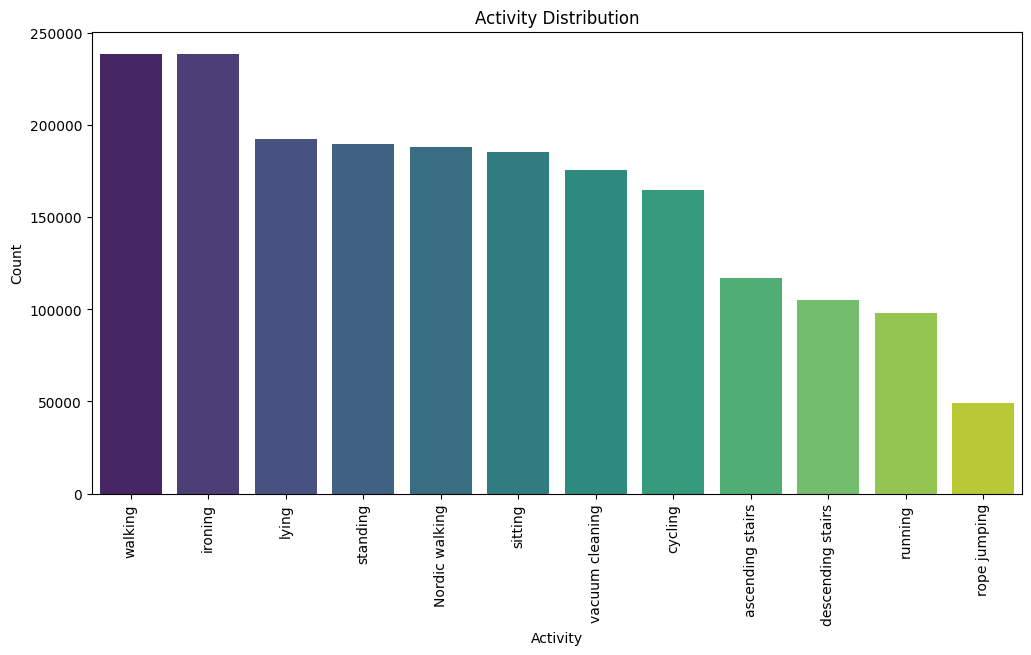

In [14]:
# Activity distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)
plt.title("Activity Distribution")
plt.xticks(rotation=90)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

<ipython-input-15-2bb77738aec8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activity_name', y='total_time_sec', data=activity_duration, palette="viridis", order=activity_duration.sort_values(by='total_time_sec', ascending=False)['activity_name'])


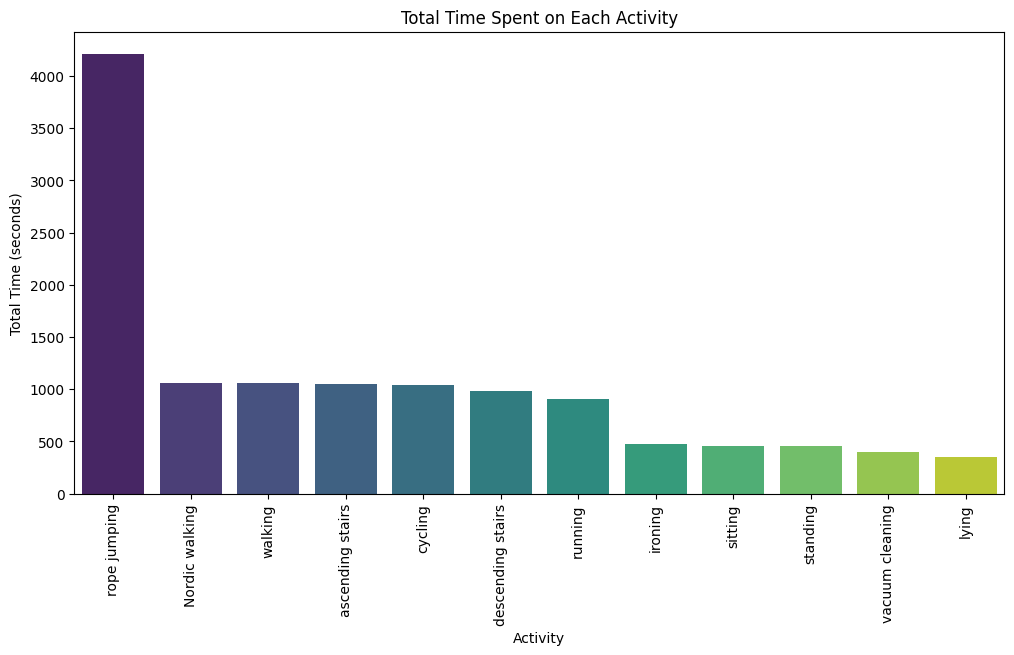

In [15]:
# Calculate total time spent on each activity
activity_duration = data.groupby('activity_id')['timestamp'].apply(lambda x: (x.max() - x.min()))
activity_duration = activity_duration.reset_index()
activity_duration.columns = ['activity_id', 'total_time_sec']

# Add activity names
activity_duration['activity_name'] = activity_duration['activity_id'].map(activity_map)

plt.figure(figsize=(12, 6))
sns.barplot(x='activity_name', y='total_time_sec', data=activity_duration, palette="viridis", order=activity_duration.sort_values(by='total_time_sec', ascending=False)['activity_name'])
plt.title("Total Time Spent on Each Activity")
plt.xlabel("Activity")
plt.ylabel("Total Time (seconds)")
plt.xticks(rotation=90)
plt.show()

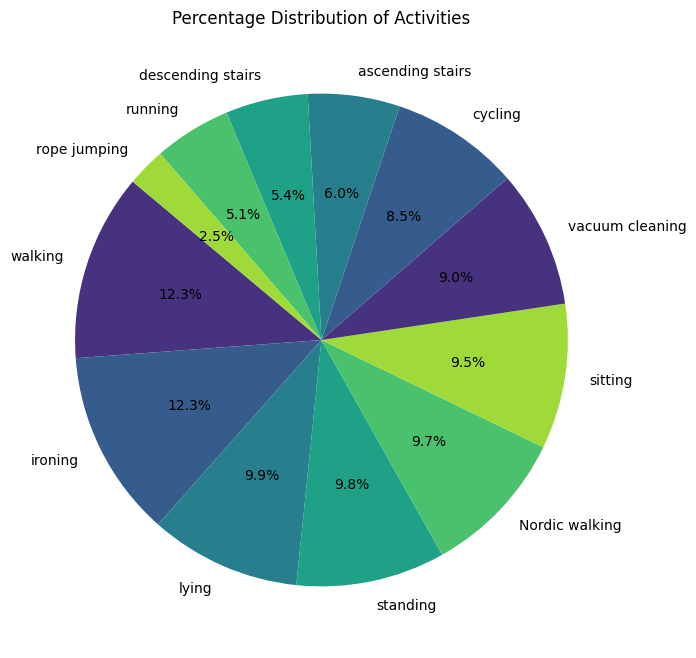

In [16]:
# Calculate class percentages
class_counts = data['activity_name'].value_counts()
class_percentages = (class_counts / class_counts.sum()) * 100

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title("Percentage Distribution of Activities")
plt.show()

In [17]:
# Summary statistics for IMU columns
imu_columns = [col for col in data.columns if 'hand' in col or 'chest' in col or 'ankle' in col]
print("IMU Sensor Data Summary:")
print(data[imu_columns].describe())

IMU Sensor Data Summary:
       hand_temperature  hand_accel_16g_X  hand_accel_16g_Y  hand_accel_16g_Z  \
count      1.931748e+06      1.931748e+06      1.931748e+06      1.931748e+06   
mean       3.275752e+01     -4.938311e+00      3.580308e+00      3.609347e+00   
std        1.791983e+00      6.231142e+00      6.887907e+00      3.960176e+00   
min        2.487500e+01     -1.453670e+02     -1.043010e+02     -1.014520e+02   
25%        3.168750e+01     -8.955800e+00      1.048068e+00      1.161655e+00   
50%        3.318750e+01     -5.426670e+00      3.523155e+00      3.441330e+00   
75%        3.406250e+01     -9.430042e-01      6.454320e+00      6.538525e+00   
max        3.550000e+01      6.285960e+01      1.556990e+02      1.577600e+02   

       hand_accel_6g_X  hand_accel_6g_Y  hand_accel_6g_Z   hand_gyro_X  \
count     1.931748e+06     1.931748e+06     1.931748e+06  1.931748e+06   
mean     -4.871064e+00     3.569088e+00     3.794033e+00  6.470148e-04   
std       6.237104e+00 

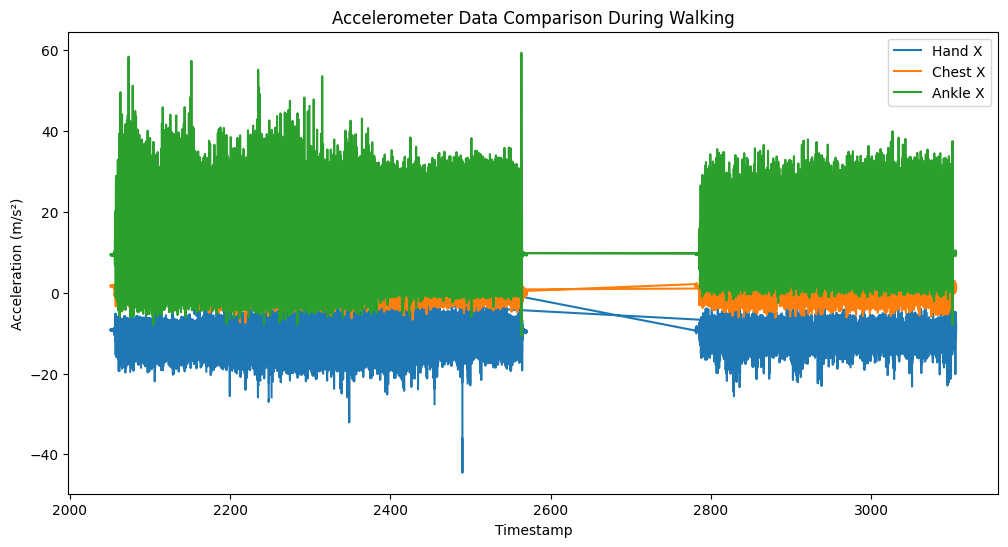

In [18]:
# Plot accelerometer data for walking
activity_walking = data[data['activity_id'] == 4]

plt.figure(figsize=(12, 6))
plt.plot(activity_walking['timestamp'], activity_walking['hand_accel_16g_X'], label='Hand X')
plt.plot(activity_walking['timestamp'], activity_walking['chest_accel_16g_X'], label='Chest X')
plt.plot(activity_walking['timestamp'], activity_walking['ankle_accel_16g_X'], label='Ankle X')
plt.title("Accelerometer Data Comparison During Walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (m/s²)")
plt.legend()
plt.show()

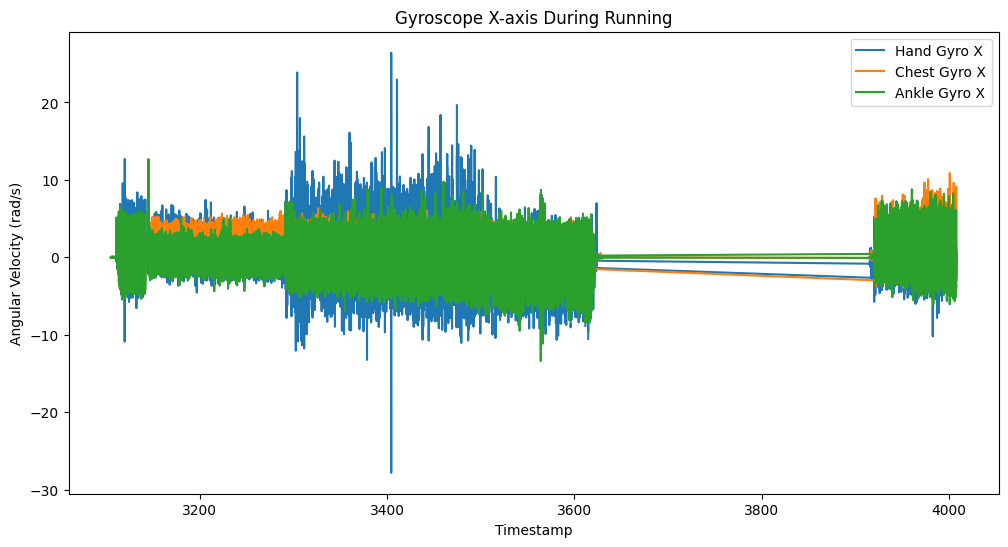

In [19]:
# Gyroscope Data for Running
running_data = data[data['activity_id'] == 5]

plt.figure(figsize=(12, 6))
plt.plot(running_data['timestamp'], running_data['hand_gyro_X'], label="Hand Gyro X")
plt.plot(running_data['timestamp'], running_data['chest_gyro_X'], label="Chest Gyro X")
plt.plot(running_data['timestamp'], running_data['ankle_gyro_X'], label="Ankle Gyro X")
plt.title("Gyroscope X-axis During Running")
plt.xlabel("Timestamp")
plt.ylabel("Angular Velocity (rad/s)")
plt.legend()
plt.show()

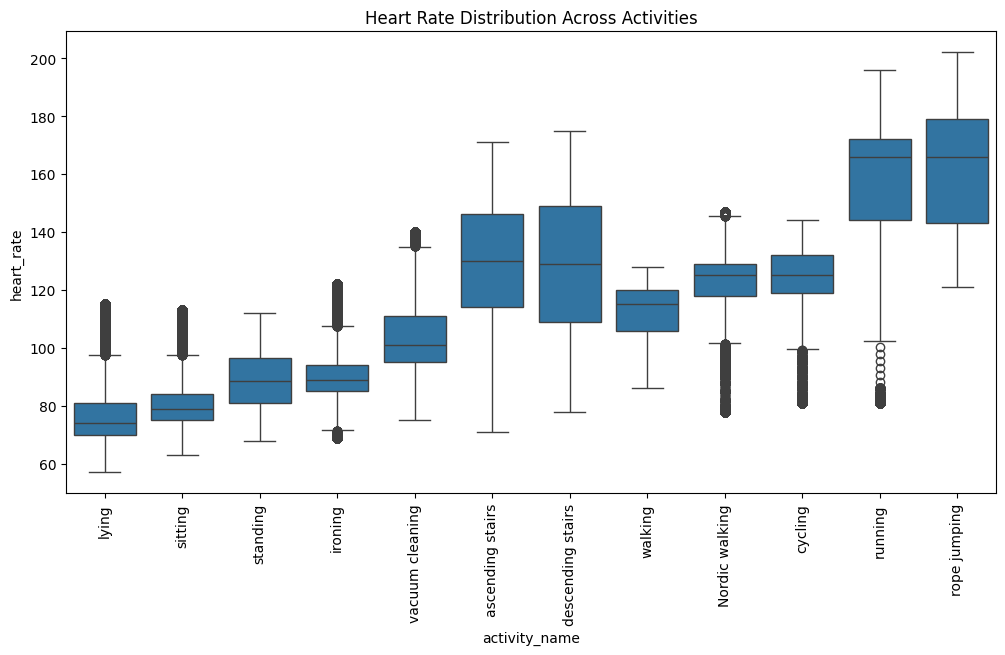

In [20]:
# Heart rate distribution by activity
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity_name', y='heart_rate', data=data)
plt.title("Heart Rate Distribution Across Activities")
plt.xticks(rotation=90)
plt.show()

<ipython-input-21-fe2a56e967b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subject_id', y='hand_accel_16g_X', data=data, palette='Set2')


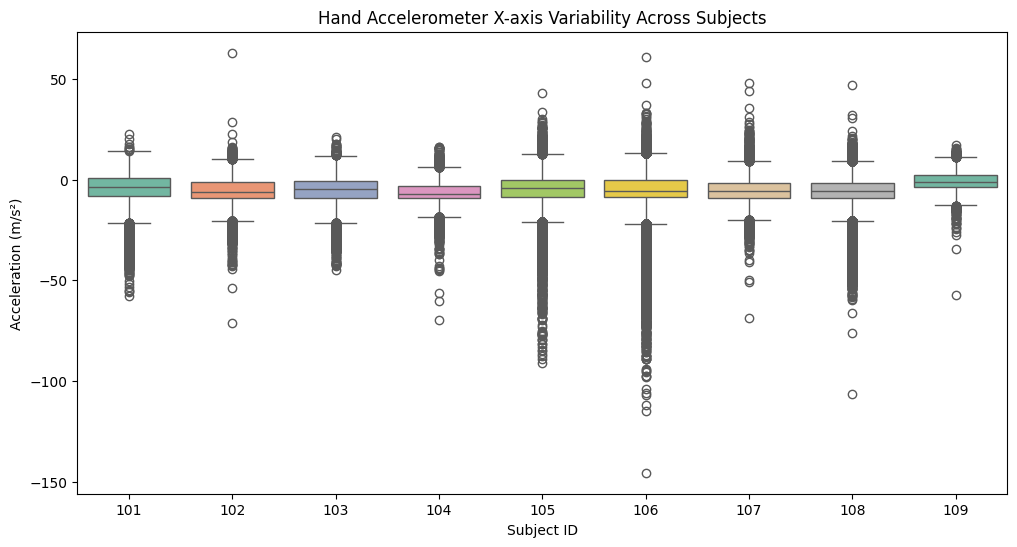

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_id', y='hand_accel_16g_X', data=data, palette='Set2')
plt.title("Hand Accelerometer X-axis Variability Across Subjects")
plt.xlabel("Subject ID")
plt.ylabel("Acceleration (m/s²)")
plt.show()

# **Feature Engineering**

In [22]:
# Define IMU sensor columns
sensor_columns = [
    'hand_temperature', 'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
    'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z', 'hand_gyro_X', 'hand_gyro_Y', 'hand_gyro_Z',
    'hand_magnet_X', 'hand_magnet_Y', 'hand_magnet_Z',
    'chest_temperature', 'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
    'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z', 'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z',
    'chest_magnet_X', 'chest_magnet_Y', 'chest_magnet_Z',
    'ankle_temperature', 'ankle_accel_16g_X', 'ankle_accel_16g_Y', 'ankle_accel_16g_Z',
    'ankle_accel_6g_X', 'ankle_accel_6g_Y', 'ankle_accel_6g_Z', 'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',
    'ankle_magnet_X', 'ankle_magnet_Y', 'ankle_magnet_Z'
]

# Function to extract features using sliding windows
def extract_features(data, window_size=100, step_size=50):
    """
    Extracts statistical features (mean, std, min, max, range) for IMU sensor data.
    Args:
        data (DataFrame): Input dataset
        window_size (int): Size of sliding window
        step_size (int): Step size for sliding window
    Returns:
        features (DataFrame): Extracted features
        labels (list): Corresponding activity labels
    """
    features = []
    labels = []

    for start in range(0, len(data) - window_size, step_size):
        end = start + window_size
        window = data.iloc[start:end]
        feature = {}

        # Extract statistical features for each sensor column
        for col in sensor_columns:
            feature[f'{col}_mean'] = window[col].mean()
            feature[f'{col}_std'] = window[col].std()
            feature[f'{col}_min'] = window[col].min()
            feature[f'{col}_max'] = window[col].max()
            feature[f'{col}_range'] = window[col].max() - window[col].min()

        # Add heart rate statistics
        feature['heart_rate_mean'] = window['heart_rate'].mean()
        feature['heart_rate_std'] = window['heart_rate'].std()
        feature['heart_rate_min'] = window['heart_rate'].min()
        feature['heart_rate_max'] = window['heart_rate'].max()

        # Add activity label (mode of activity ID in the window)
        labels.append(window['activity_id'].mode()[0])
        features.append(feature)

    return pd.DataFrame(features), np.array(labels)

# Apply the feature extraction function
features, labels = extract_features(data)

# Print shape and sample of extracted features
print("Extracted Features Shape:", features.shape)
print("Sample Extracted Features:")
print(features.head())

Extracted Features Shape: (38856, 199)
Sample Extracted Features:
   hand_temperature_mean  hand_temperature_std  hand_temperature_min  \
0               30.37500              0.000000               30.3750   
1               30.37500              0.000000               30.3750   
2               30.39750              0.030151               30.3750   
3               30.42875              0.021796               30.3750   
4               30.43750              0.000000               30.4375   

   hand_temperature_max  hand_temperature_range  hand_accel_16g_X_mean  \
0               30.3750                  0.0000               2.429617   
1               30.3750                  0.0000               1.037049   
2               30.4375                  0.0625              -1.213772   
3               30.4375                  0.0625              -1.567099   
4               30.4375                  0.0000              -1.371397   

   hand_accel_16g_X_std  hand_accel_16g_X_min  hand_acce

In [23]:
print("Feature Columns:")
print(features.columns)

print("\nLabels Sample:")
print(labels[:10])

Feature Columns:
Index(['hand_temperature_mean', 'hand_temperature_std', 'hand_temperature_min',
       'hand_temperature_max', 'hand_temperature_range',
       'hand_accel_16g_X_mean', 'hand_accel_16g_X_std', 'hand_accel_16g_X_min',
       'hand_accel_16g_X_max', 'hand_accel_16g_X_range',
       ...
       'ankle_magnet_Y_range', 'ankle_magnet_Z_mean', 'ankle_magnet_Z_std',
       'ankle_magnet_Z_min', 'ankle_magnet_Z_max', 'ankle_magnet_Z_range',
       'heart_rate_mean', 'heart_rate_std', 'heart_rate_min',
       'heart_rate_max'],
      dtype='object', length=199)

Labels Sample:
[1 1 1 1 1 1 1 1 1 1]


In [24]:
# Save features and labels to CSV
features.to_csv("pamap2_extracted_features.csv", index=False)
pd.DataFrame(labels, columns=['activity_id']).to_csv("pamap2_labels.csv", index=False)

print("Features and labels saved successfully!")

Features and labels saved successfully!


# **Methodology**

In [25]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = labels

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **1. Random Forest Classifier**

Random Forest Results:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       770
           2       1.00      0.97      0.98       741
           3       0.97      0.99      0.98       760
           4       1.00      0.99      0.99       955
           5       1.00      0.99      0.99       393
           6       0.99      1.00      0.99       658
           7       0.99      1.00      0.99       752
          12       0.95      0.97      0.96       469
          13       0.97      0.95      0.96       420
          16       0.95      0.98      0.96       701
          17       0.99      0.98      0.99       955
          24       0.99      0.97      0.98       198

    accuracy                           0.98      7772
   macro avg       0.98      0.98      0.98      7772
weighted avg       0.98      0.98      0.98      7772



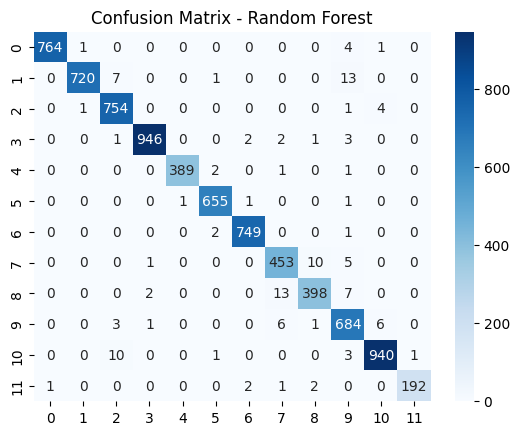

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

## **2. Support Vector Machine(SVM) Classifier**

SVM Results:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       770
           2       0.98      0.96      0.97       741
           3       0.92      0.98      0.95       760
           4       1.00      0.98      0.99       955
           5       0.99      0.99      0.99       393
           6       0.99      0.99      0.99       658
           7       0.99      1.00      0.99       752
          12       0.93      0.93      0.93       469
          13       0.92      0.93      0.93       420
          16       0.95      0.96      0.95       701
          17       0.98      0.97      0.97       955
          24       0.97      0.97      0.97       198

    accuracy                           0.97      7772
   macro avg       0.97      0.97      0.97      7772
weighted avg       0.97      0.97      0.97      7772



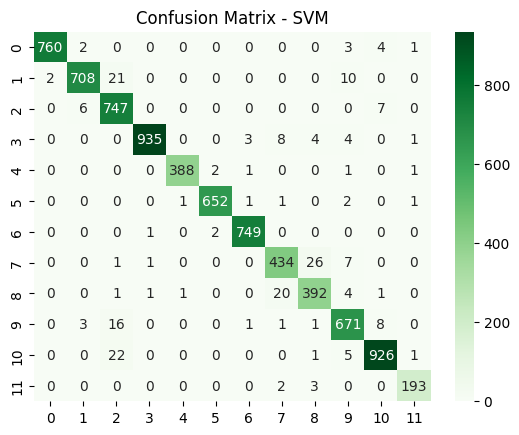

In [27]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM")
plt.show()

## **3. Desicion Tree Classifier**

Decision Tree Results:
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       770
           2       0.98      0.93      0.95       741
           3       0.90      0.98      0.94       760
           4       0.94      0.96      0.95       955
           5       0.98      0.95      0.96       393
           6       0.91      0.97      0.94       658
           7       0.96      0.96      0.96       752
          12       0.85      0.83      0.84       469
          13       0.89      0.84      0.87       420
          16       0.86      0.88      0.87       701
          17       0.97      0.94      0.96       955
          24       0.96      0.87      0.91       198

    accuracy                           0.93      7772
   macro avg       0.93      0.92      0.93      7772
weighted avg       0.93      0.93      0.93      7772



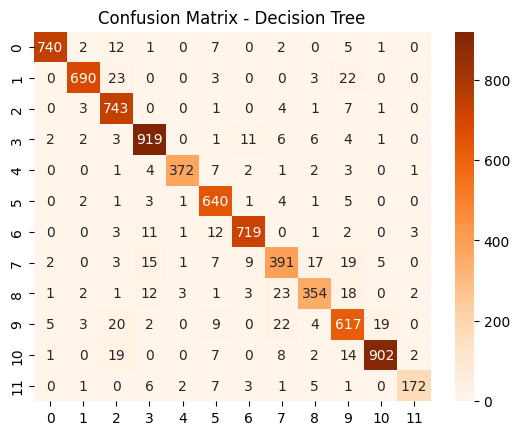

In [28]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [29]:
models = ["Random Forest", "SVM", "Decision Tree"]
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_dt),
]

print("\nFinal Model Comparison:")
for model, acc in zip(models, accuracies):
    print(f"{model}: Accuracy = {acc:.4f}")


Final Model Comparison:
Random Forest: Accuracy = 0.9835
SVM: Accuracy = 0.9721
Decision Tree: Accuracy = 0.9340


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [31]:
# Compute metrics
metrics = {
    "Model": ["Random Forest", "SVM", "Decision Tree"],
    "Precision": [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_dt, average='weighted')
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_dt, average='weighted')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_dt, average='weighted')
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print("Model Performance Comparison:")
print(metrics_df)

Model Performance Comparison:
           Model  Precision    Recall  F1-Score
0  Random Forest   0.983729  0.983531  0.983568
1            SVM   0.972554  0.972079  0.972186
2  Decision Tree   0.934975  0.933994  0.934003


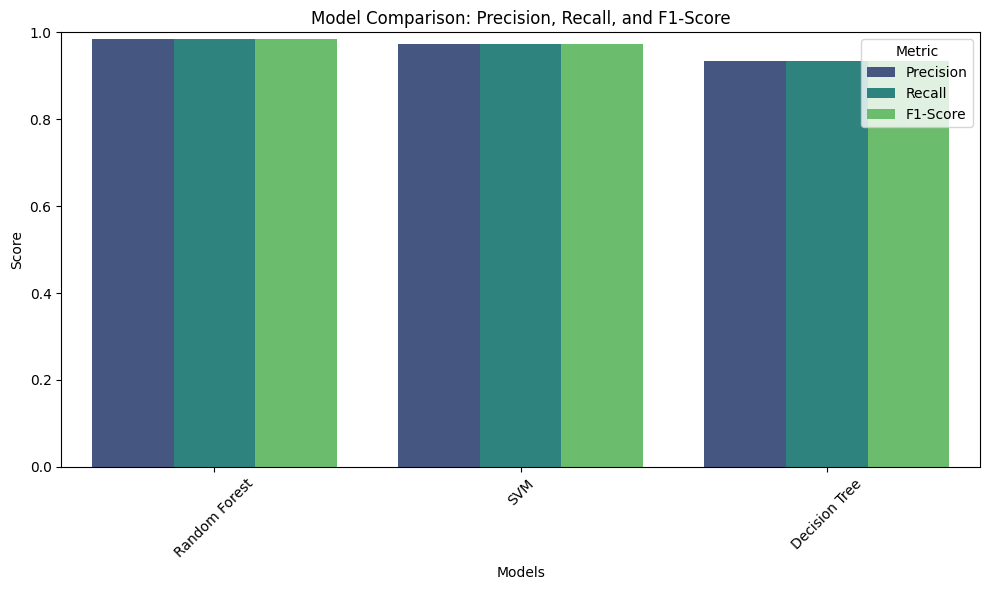

In [32]:
# Plot metrics for comparison with Models on X-axis
plt.figure(figsize=(10, 6))

# Set up the data for a grouped bar chart
metrics_long = pd.melt(metrics_df, id_vars="Model", var_name="Metric", value_name="Score")

# Use seaborn to create a grouped bar plot
sns.barplot(data=metrics_long, x="Model", y="Score", hue="Metric", palette="viridis")

# Customize the plot
plt.title("Model Comparison: Precision, Recall, and F1-Score")
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure consistent scale across metrics
plt.legend(title="Metric")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()

# Show the plot
plt.show()

# **Deployment**

In [33]:
# Check missing values
print(data.isnull().sum())

timestamp                  0
activity_id                0
heart_rate                 0
hand_temperature       11124
hand_accel_16g_X       11124
hand_accel_16g_Y       11124
hand_accel_16g_Z       11124
hand_accel_6g_X        11124
hand_accel_6g_Y        11124
hand_accel_6g_Z        11124
hand_gyro_X            11124
hand_gyro_Y            11124
hand_gyro_Z            11124
hand_magnet_X          11124
hand_magnet_Y          11124
hand_magnet_Z          11124
hand_orientation_1     11124
hand_orientation_2     11124
hand_orientation_3     11124
hand_orientation_4     11124
chest_temperature       2420
chest_accel_16g_X       2420
chest_accel_16g_Y       2420
chest_accel_16g_Z       2420
chest_accel_6g_X        2420
chest_accel_6g_Y        2420
chest_accel_6g_Z        2420
chest_gyro_X            2420
chest_gyro_Y            2420
chest_gyro_Z            2420
chest_magnet_X          2420
chest_magnet_Y          2420
chest_magnet_Z          2420
chest_orientation_1     2420
chest_orientat

In [34]:
# Interpolate missing values linearly
data.interpolate(method='linear', inplace=True)

<ipython-input-34-64c4122cdfae>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [35]:
data['heart_rate'] = data['heart_rate'].fillna(
    data['heart_rate'].rolling(window=5, min_periods=1).mean()
)

In [36]:
data.dropna(subset=['activity_id'], inplace=True)

In [37]:
print("Remaining Missing Values:")
print(data.isnull().sum().sum())

Remaining Missing Values:
0


In [38]:
print("Data Shape:", data.shape)
print("\nData Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

Data Shape: (1942872, 56)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1942872 entries, 2928 to 2872019
Data columns (total 56 columns):
 #   Column               Dtype  
---  ------               -----  
 0   timestamp            float64
 1   activity_id          int64  
 2   heart_rate           float64
 3   hand_temperature     float64
 4   hand_accel_16g_X     float64
 5   hand_accel_16g_Y     float64
 6   hand_accel_16g_Z     float64
 7   hand_accel_6g_X      float64
 8   hand_accel_6g_Y      float64
 9   hand_accel_6g_Z      float64
 10  hand_gyro_X          float64
 11  hand_gyro_Y          float64
 12  hand_gyro_Z          float64
 13  hand_magnet_X        float64
 14  hand_magnet_Y        float64
 15  hand_magnet_Z        float64
 16  hand_orientation_1   float64
 17  hand_orientation_2   float64
 18  hand_orientation_3   float64
 19  hand_orientation_4   float64
 20  chest_temperature    float64
 21  chest_accel_16g_X    float64
 22  chest_accel_16g_Y    float64
 

<ipython-input-42-e6fef714927b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)


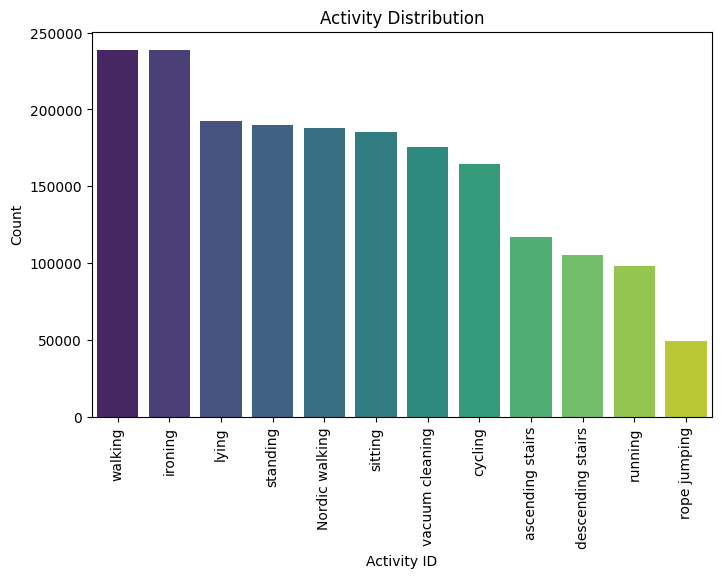

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)
plt.title("Activity Distribution")
plt.xticks(rotation=90)
plt.xlabel("Activity ID")
plt.ylabel("Count")
plt.show()

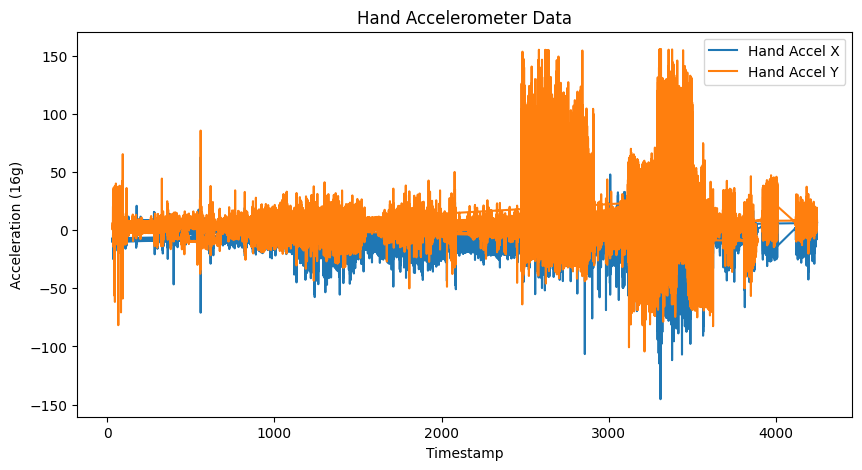

In [43]:
# Plot hand acceleration over time
plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['hand_accel_16g_X'], label='Hand Accel X')
plt.plot(data['timestamp'], data['hand_accel_16g_Y'], label='Hand Accel Y')
plt.title("Hand Accelerometer Data")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration (16g)")
plt.legend()
plt.show()